# Hypothesis/ Questions?
* When we need log transformation ?
* Which log base ? natural, 2, 10 ?
* When we need **2 polynomial ?
* Distribution with Spike, very low variance/ standard deviation

# By observation
* STD, Var, Mean
* MSE

# LIbraries

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline

# Sample Generation

In [81]:
samples = np.random.normal(loc=50,size=1000)

In [82]:
samples_df = pd.DataFrame()
samples_df["Samples"] = samples

# Describe sample

STD:  1.0143550528559053 Skew:  -0.027537091645046228 Var:  1.0289161732543064 Skew*Mean:  -1.3753308876491597


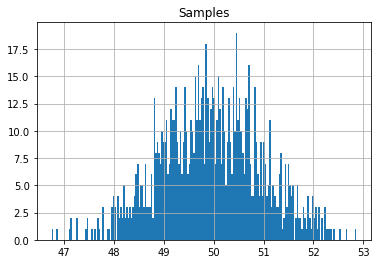

In [83]:
samples_df.hist(bins=200)
print("STD: ",samples_df.std()[0]
      , "Skew: ", samples_df.skew()[0]
      , "Var: ", samples_df.var()[0]
      , "Skew*Mean: ", samples_df.mean()[0]*samples_df.skew()[0]
     )

# 4 Describe transformed sample

STD:  358660896000302.1 Skew:  0.41387619911189644 Var:  1.2863763831973952e+29 Skew*Mean:  812242145633855.4


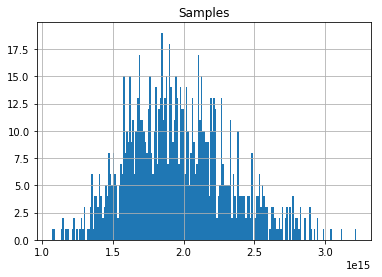

In [84]:
samples2_df = samples_df**9
samples2_df.hist(bins=200)
print("STD: ",samples2_df.std()[0]
      , "Skew: ", samples2_df.skew()[0]
      , "Var: ", samples2_df.var()[0]
      , "Skew*Mean: ", samples2_df.mean()[0]*samples2_df.skew()[0]
     )

# how it looks after log

STD:  0.26390728298675703 Skew:  -0.08426835845717144 Var:  0.06964705401345225 Skew*Mean:  -4.278949294288449


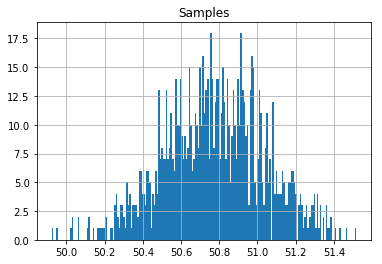

In [85]:
samples2_df = np.log2(samples_df**9)
samples2_df.hist(bins=200)
print("STD: ",samples2_df.std()[0]
      , "Skew: ", samples2_df.skew()[0]
      , "Var: ", samples2_df.var()[0]
      , "Skew*Mean: ", samples2_df.mean()[0]*samples2_df.skew()[0]
     )

# which one fits better?

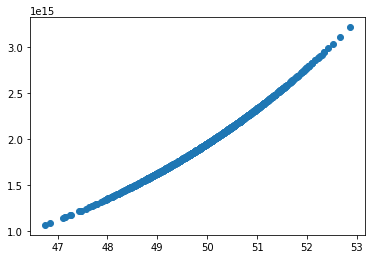

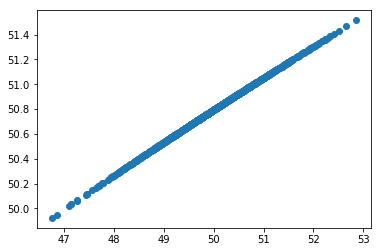

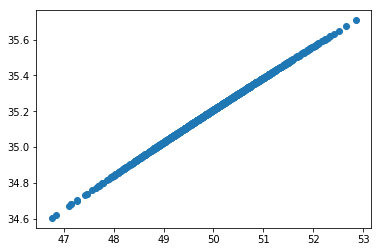

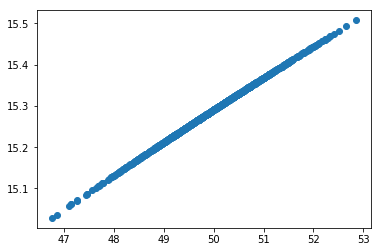

In [91]:
from matplotlib import pyplot as plt

plt.plot(samples_df,samples_df**9,"o")
plt.show()
plt.close()

plt.plot(samples_df,np.log2(samples_df**9),"o")
plt.show()
plt.close()

plt.plot(samples_df,np.log(samples_df**9),"o")
plt.show()
plt.close()

plt.plot(samples_df,np.log10(samples_df**9),"o")
plt.show()
plt.close()


In [80]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


LR_model = linear_model.LinearRegression()
LR_model.fit(samples_df**9,samples_df)
y_pred = LR_model.predict(samples2_df)
print("Not Logged X, MSE: ", mean_squared_error(y_pred,samples_df))

LR_model = linear_model.LinearRegression()
LR_model.fit(np.log2(samples_df**9),samples_df)
y_pred = LR_model.predict(samples2_df)
print("Logged base2 X, MSE: ", mean_squared_error(y_pred,samples_df))

LR_model = linear_model.LinearRegression()
LR_model.fit(np.log(samples_df**9),samples_df)
y_pred = LR_model.predict(samples2_df)
print("Logged base2.718 X, MSE: ", mean_squared_error(y_pred,samples_df))

LR_model = linear_model.LinearRegression()
LR_model.fit(np.log10(samples_df**9),samples_df)
y_pred = LR_model.predict(samples2_df)
print("Logged base10 X, MSE: ", mean_squared_error(y_pred,samples_df))

LR_model = linear_model.LinearRegression()
LR_model.fit(np.log(samples_df**9)/np.log(1.5),samples_df)
y_pred = LR_model.predict(samples2_df)
print("Logged base1.5 X, MSE: ", mean_squared_error(y_pred,samples_df))








Not Logged X, MSE:  31.533080040162144
Logged base2 X, MSE:  0.00019883263813462763
Logged base2.718 X, MSE:  7487.760045340021
Logged base10 X, MSE:  205987.1487658833
Logged base1.5 X, MSE:  6581.384762274268


# Conclusion

* At Higher mean, even if skewness is low, you need log transformation, line plot inverse 'U' , swell upside
* now log, log2 or log10 ?

# When we need polynomial

STD:  0.005195566729021033 Skew:  -0.08426835845720144 Var:  2.699391363571032e-05


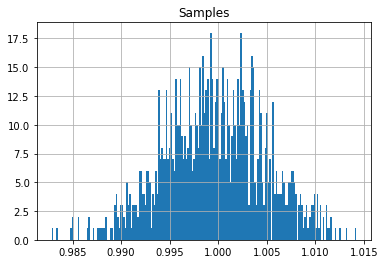

In [111]:
samples2_df = np.log(samples_df)/np.log(50)
samples2_df.hist(bins=200)
print("STD: ",samples2_df.std()[0]
      , "Skew: ", samples2_df.skew()[0]
      , "Var: ", samples2_df.var()[0]
     )

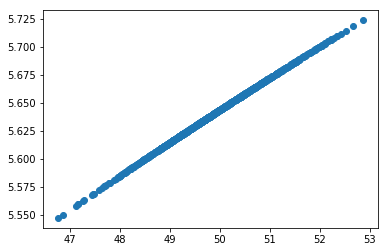

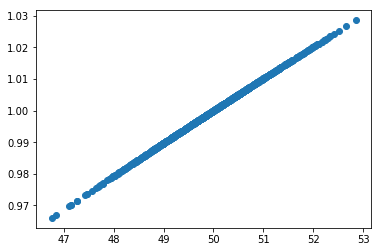

In [93]:
from matplotlib import pyplot as plt


plt.plot(samples_df,np.log(samples_df)/np.log(2),"o")
plt.show()
plt.close()

plt.plot(samples_df,(np.log(samples_df)/np.log(50))**2,"o")
plt.show()
plt.close()
